In [90]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
import sys, os, random, re, datetime, string
from imp import reload

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

sys.path.append('.')
from backend import data_handling; reload(data_handling);
from backend import metrics; reload(metrics);
from backend import metric_buttons; reload(metric_buttons);

PATH_TO_LOADER_CONFIG = 'in/data_loader_config.txt'

PATH_TO_MCC_COLUMNS = 'in/mcc_file_columns.txt'
PATH_TO_STORES_COLUMNS = 'in/stores_file_columns.txt'
PATH_TO_TRANSACTIONS_COLUMNS = 'in/transactions_file_columns.txt'
PATH_TO_CLIENTS_COLUMNS = 'in/clients_file_columns.txt'
PATH_TO_CLIENT_CATEGORIES_COLUMNS = 'in/client_categories_file_columns.txt'
PATH_TO_CLIENT_INTERNET_DATA_COLUMNS = 'in/client_internet_data_file_columns.txt'

PATH_TO_MCC_FILE = 'data/mcc.csv'
PATH_TO_STORES_FILE = 'data/stores.csv'
PATH_TO_TRANSACTIONS_FILE = 'data/transactions.csv'
PATH_TO_CLIENTS_FILE = 'data/clients.csv'
PATH_TO_CLIENT_CATEGORIES_FILE = 'data/client_categories.csv'
PATH_TO_CLIENT_INTERNET_DATA_FILE = 'data/client_internet_data.csv'

<module 'backend.data_handling' from 'C:\\Users\\Ivan\\Documents\\DS projects\\RaifHack 2020\\dev\\backend\\data_handling.py'>

<module 'backend.metrics' from 'C:\\Users\\Ivan\\Documents\\DS projects\\RaifHack 2020\\dev\\backend\\metrics.py'>

<module 'backend.metric_buttons' from 'C:\\Users\\Ivan\\Documents\\DS projects\\RaifHack 2020\\dev\\backend\\metric_buttons.py'>

In [91]:
print('test button_Age:')
metric_buttons.button_Age()
print('test button_AverageBill:')
metric_buttons.button_AverageBill()
print('test button_AverageTransactionNumber:')
metric_buttons.button_AverageTransactionNumber()
print('test button_ClientAverageBill:')
metric_buttons.button_ClientAverageBill()
print('test button_ClientNumberInSegmentRate:')
metric_buttons.button_ClientNumberInSegmentRate('D7HXZ.JL') #, ['z','c','n'])
print('test button_Gender:')
metric_buttons.button_Gender()
print('test button_IncomeInSegmentRate:')
metric_buttons.button_IncomeInSegmentRate('D7HXZ.JL') #['z','c','n'])
print('test button_NewClientTransactions:')
metric_buttons.button_NewClientTransactions()
print('test button_Revenue:')
metric_buttons.button_Revenue('D7HXZ.JL')
print('test button_TransactionNumberInSegmentRate:')
metric_buttons.button_TransactionNumberInSegmentRate('D7HXZ.JL')
print('test button_RevenueDynamicByDay:')
metric_buttons.button_RevenueDynamicByDay()
print('test button_RevenueDynamicByDay:')
metric_buttons.button_RevenueDynamicByDay(['D7HXZ.JL'])
print('test button_LTV:')
metric_buttons.button_LTV()
print('test button_Retention:')
metric_buttons.button_Retention()

test button_Age:


,mean
Age,


test button_AverageBill:


1323738.564146949

test button_AverageTransactionNumber:


Date
2019-09-16    1.000000
2019-09-17    1.000000
2019-09-18    1.000000
2019-09-19    1.000000
2019-09-20    1.333333
2019-09-21    1.000000
2019-09-22    1.100000
2019-09-23    1.000000
2019-09-24    1.555556
2019-09-25    1.000000
2019-09-26    1.090909
2019-09-27    1.700000
2019-09-28    1.076923
2019-09-29    1.000000
2019-09-30    1.000000
2019-10-01    1.000000
2019-10-02    1.000000
2019-10-03    1.000000
2019-10-04    1.000000
2019-10-05    1.000000
2019-10-06    1.000000
2019-10-07    1.142857
2019-10-08    1.090909
2019-10-09    1.000000
2019-10-10    1.250000
2019-10-11    1.000000
2019-10-12    1.181818
2019-10-13    1.000000
2019-10-14    1.000000
2019-10-15    1.000000
                ...   
2019-11-20    1.000000
2019-11-21    1.000000
2019-11-22    1.100000
2019-11-23    1.090909
2019-11-24    1.111111
2019-11-25    1.000000
2019-11-26    1.100000
2019-11-27    1.000000
2019-11-28    1.066667
2019-11-29    1.000000
2019-11-30    1.000000
2019-12-01    1.000000
2019-1

test button_ClientAverageBill:


CNUM    Date      
0DNXFH  2019-09-23     844700.00
0FFNNS  2019-11-18    1081005.00
0FSYDD  2019-09-28     683351.83
0GSCHC  2019-11-29     910000.00
0GSHXY  2019-12-05     665000.00
0NGYGD  2019-11-27     883142.00
0NHFXS  2019-12-01     908600.00
0NOGYY  2019-10-09     681267.92
0SGCGY  2019-12-16     715000.00
0SGOOD  2019-12-04    1240000.00
0SXGSG  2019-10-15    1125573.00
0XCONY  2019-12-17    1000000.00
0XGDYO  2019-10-12     600000.00
0XNSOX  2019-11-30     688452.00
0XYSOC  2019-09-23     748000.00
0YNCYH  2019-10-12     960000.00
0YSXHD  2019-11-06     950000.00
1CSCHX  2019-12-15     800000.00
1DCCXY  2019-11-18    1500000.00
1DGYYC  2019-12-02    1000000.00
1HDFHG  2019-12-03    3091200.00
        2019-12-05    2235720.00
        2019-12-12    2447201.00
1OFDXG  2019-10-13     945000.00
1OGCXS  2019-12-07     720000.00
1OSSXD  2019-11-26    1582000.00
1OXGOS  2019-10-27     814600.00
1YDYXO  2019-11-28    1113056.00
2DFDGC  2019-10-03    1039365.00
2FSOHF  2019-09-30     8

test button_ClientNumberInSegmentRate:


[('D7HXZ.JL', 2, 48),
 ('XXX K3 J749914K1D H491', 1, 67),
 ('D7HXZ.JL', 2, 48),
 ('71JX9HXE W7X', 3, 29),
 ('EKLC EJ784DZ AXLK1', 4, 19),
 ('C1JILJO', 5, 16)]

test button_Gender:


,sum
Gender,


test button_IncomeInSegmentRate:


[('D7HXZ.JL', 2, 59336958),
 ('XXX K3 J749914K1D H491', 1, 66272003.430000015),
 ('D7HXZ.JL', 2, 59336958.25),
 ('IA7D1H Z1D1T7', 3, 34087800.0),
 ('ELJ34KA 74JH4D1K', 4, 28333243.0),
 ('71JX9HXE W7X', 5, 25956224.0)]

test button_NewClientTransactions:


701

test button_Revenue:


Date
2019-09-21    0.0
2019-09-28    0.0
2019-09-30    0.0
2019-10-06    0.0
2019-10-07    0.0
2019-10-11    0.0
2019-10-18    0.0
2019-10-19    0.0
2019-10-23    0.0
2019-10-25    0.0
2019-10-31    0.0
2019-11-02    0.0
2019-11-04    0.0
2019-11-09    0.0
2019-11-13    0.0
2019-11-14    0.0
2019-11-20    0.0
2019-11-25    0.0
2019-11-26    0.0
2019-11-27    0.0
2019-11-28    0.0
2019-11-29    0.0
2019-11-30    0.0
2019-12-01    0.0
2019-12-02    0.0
2019-12-03    0.0
2019-12-05    0.0
2019-12-09    0.0
2019-12-10    0.0
2019-12-11    0.0
2019-12-13    0.0
Name: Amount, dtype: float64

test button_TransactionNumberInSegmentRate:


[('D7HXZ.JL', 2, 54),
 ('XXX K3 J749914K1D H491', 1, 72),
 ('D7HXZ.JL', 2, 54),
 ('71JX9HXE W7X', 3, 31),
 ('ELJ34KA 74JH4D1K', 4, 27),
 ('EKLC EJ784DZ AXLK1', 5, 24)]

test button_RevenueDynamicByDay:


Date
2019-09-16     2395714.10
2019-09-17     2891211.00
2019-09-18    10874245.42
2019-09-19     9533378.16
2019-09-20    17199001.00
2019-09-21    14280781.08
2019-09-22    11386706.00
2019-09-23     9626243.00
2019-09-24    13411076.38
2019-09-25     6194630.92
2019-09-26    14732319.99
2019-09-27    18382132.30
2019-09-28    12255986.83
2019-09-29     6491796.00
2019-09-30    19232613.00
2019-10-01     7489932.61
2019-10-02     5305996.89
2019-10-03     9028179.51
2019-10-04     7382800.00
2019-10-05     5777932.14
2019-10-06     8164144.48
2019-10-07     7792746.56
2019-10-08    11980221.12
2019-10-09    12982129.29
2019-10-10     8817690.68
2019-10-11     9936422.69
2019-10-12    10385619.40
2019-10-13    10780734.64
2019-10-14    20604528.38
2019-10-15    16093225.72
                 ...     
2019-11-20     7158607.99
2019-11-21     5799341.75
2019-11-22    23152089.50
2019-11-23    15833338.51
2019-11-24     9228596.21
2019-11-25    15052884.47
2019-11-26    12048541.25
2019-11

test button_RevenueDynamicByDay:


Date
2019-09-21     641470.00
2019-09-28     839042.00
2019-09-30    2741025.00
2019-10-06     595361.00
2019-10-07     888757.54
2019-10-11    1339265.00
2019-10-18     763553.35
2019-10-19     960812.00
2019-10-23     959870.00
2019-10-25    1354755.00
2019-10-31     962574.00
2019-11-02    1225270.33
2019-11-04     671790.00
2019-11-09    2131145.00
2019-11-13    1423420.00
2019-11-14    4824070.97
2019-11-20    1222543.82
2019-11-25    4255443.00
2019-11-26    5733176.25
2019-11-27    3206787.13
2019-11-28    4492035.34
2019-11-29    2320025.24
2019-11-30    1517039.00
2019-12-01     677187.60
2019-12-02     679950.00
2019-12-03    6071499.00
2019-12-05    3438128.23
2019-12-09    1011424.00
2019-12-10     600000.00
2019-12-11     996878.73
2019-12-13     792659.72
Name: Amount, dtype: float64

test button_LTV:


CNUM
0DNXFH     844700.00
0FFNNS    1081005.00
0FSYDD     683351.83
0GSCHC     910000.00
0GSHXY     665000.00
0NGYGD     883142.00
0NHFXS     908600.00
0NOGYY     681267.92
0SGCGY     715000.00
0SGOOD    1240000.00
0SXGSG    1125573.00
0XCONY    1000000.00
0XGDYO     600000.00
0XNSOX     688452.00
0XYSOC     748000.00
0YNCYH     960000.00
0YSXHD     950000.00
1CSCHX     800000.00
1DCCXY    1500000.00
1DGYYC    1000000.00
1HDFHG    7774121.00
1OFDXG     945000.00
1OGCXS     720000.00
1OSSXD    1582000.00
1OXGOS     814600.00
1YDYXO    1113056.00
2DFDGC    1039365.00
2FSOHF     833500.00
2GDCHD     771800.00
2GGFCO    1363167.20
             ...    
TNDNCC     833202.00
TPJMKI     594000.00
TPJMKR    1000000.00
TQJJPP     844000.00
TQLMKL     655000.00
TTJMPR    1585000.00
TTKKJM     900000.00
TTNNKR     755035.60
TTTITT    1467865.00
UCCSDD    1892000.00
UFFSCH    1000000.00
UFHSOF     600242.00
UGYOCN     900000.00
UNNSYH     600570.00
UOCFYY    1225000.00
UOOCFH     695000.00
UYCCON  

test button_Retention:


period_number    0         1         2         3
cohort                                          
2019-09        1.0  0.102941  0.095588  0.066176
2019-10        1.0  0.074510  0.031373       NaN
2019-11        1.0  0.059701       NaN       NaN
2019-12        1.0       NaN       NaN       NaN

In [3]:
x_train = pd.DataFrame({'x0':random.choices(np.linspace(0,10,10), k=10),
                        'x1':random.choices(np.linspace(0,10,10), k=10)})
x_train

y_train = random.choices([0,1], k=10)
y_train

,x0,x1
0,1.111111,0.000000
1,0.000000,7.777778
2,4.444444,8.888889
3,4.444444,2.222222
4,2.222222,2.222222
5,0.000000,7.777778
6,2.222222,4.444444
7,7.777778,10.000000
8,7.777778,2.222222
9,4.444444,10.000000


[1, 1, 1, 1, 0, 1, 1, 1, 0, 1]

In [4]:
model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=1, n_jobs=-1)
_ = model.fit(x_train, y_train)

In [54]:
from sklearn.tree import _tree

def print_tree_paths(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

def get_tree_paths(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth, path_l, path_r, paths):
        indent = "\t"
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            
            path_l += ' ' + "{}if {} <= {}:".format(indent, name, threshold)
            path_l += ' ' + str(recurse(tree_.children_left[node], depth + 1, path_l, path_l, paths))
            #print(path_l)
            paths.append(path_l)
            
            path_r += ' ' + "{}if {} > {}".format(indent, name, threshold)
            path_r += ' ' + str(recurse(tree_.children_right[node], depth + 1, path_r, path_r, paths))
            #print(path_r)
            paths.append(path_r)
        else:
            r1 = "{}return {}".format(indent, tree_.value[node])
            r2 = tree_.value[node]
            leaf_support = r2[0][0]+r2[0][1]
            class_1_proba = 1.0 * r2[0][1] / leaf_support 
            return r1+indent+str(r2[0][0])+indent+str(r2[0][1])+indent+str(leaf_support)+indent+str(class_1_proba)

    paths = []
    _ = recurse(0, 1, '', '', paths)
    
    paths = [p.strip().split('\t') for p in paths if len(p.strip().split('\t')) > 1]
    paths = [[' '.join(p[:-4])]+[' '.join(p[:-5])+' return '+str(p[-1])]+p[-4:] for p in paths]
    
    return paths

In [57]:
for tree_i in model.estimators_:
    p = tree_to_code_1(tree_i, x_train.columns)
    print('==================')
    print(p)

[['if x1 <= 3.3333334922790527:  return [[4. 0.]]', 'if x1 <= 3.3333334922790527:  return 0.0', '4.0', '0.0', '4.0', '0.0'], ['if x1 > 3.3333334922790527  return [[0. 6.]]', 'if x1 > 3.3333334922790527  return 1.0', '0.0', '6.0', '6.0', '1.0']]
[['if x0 <= 3.3333334922790527:  if x1 <= 5.0:  return [[3. 1.]]', 'if x0 <= 3.3333334922790527:  if x1 <= 5.0:  return 0.25', '3.0', '1.0', '4.0', '0.25'], ['if x0 <= 3.3333334922790527:  if x1 > 5.0  return [[0. 2.]]', 'if x0 <= 3.3333334922790527:  if x1 > 5.0  return 1.0', '0.0', '2.0', '2.0', '1.0'], ['if x0 > 3.3333334922790527  return [[0. 4.]]', 'if x0 > 3.3333334922790527  return 1.0', '0.0', '4.0', '4.0', '1.0']]
[['if x1 <= 5.0:  return [[3. 0.]]', 'if x1 <= 5.0:  return 0.0', '3.0', '0.0', '3.0', '0.0'], ['if x1 > 5.0  return [[0. 7.]]', 'if x1 > 5.0  return 1.0', '0.0', '7.0', '7.0', '1.0']]
[['if x0 <= 1.1111111640930176:  return [[0. 4.]]', 'if x0 <= 1.1111111640930176:  return 1.0', '0.0', '4.0', '4.0', '1.0'], ['if x0 > 1.111111

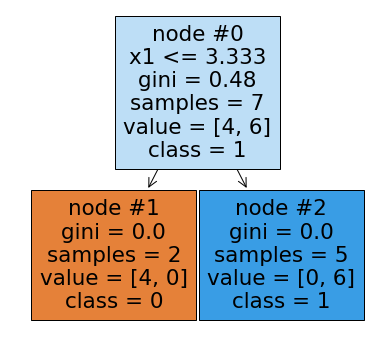

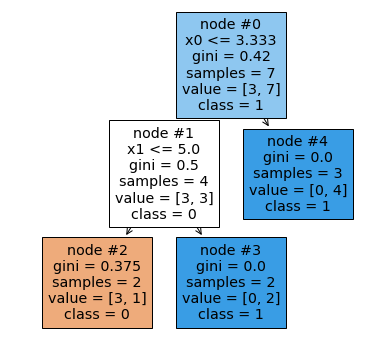

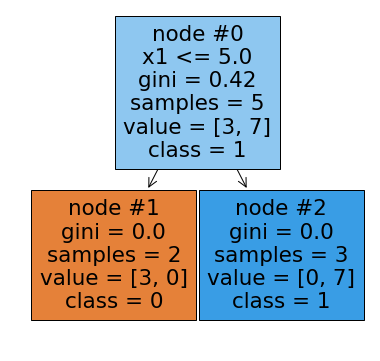

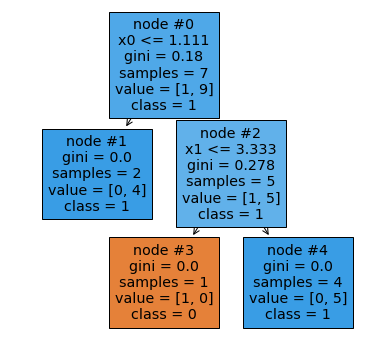

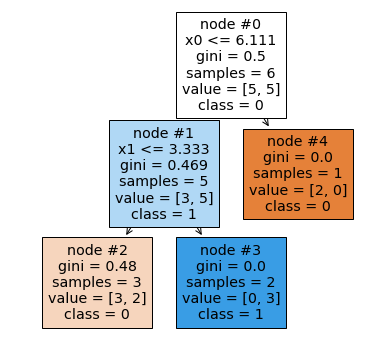

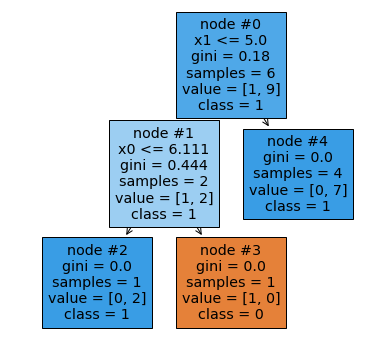

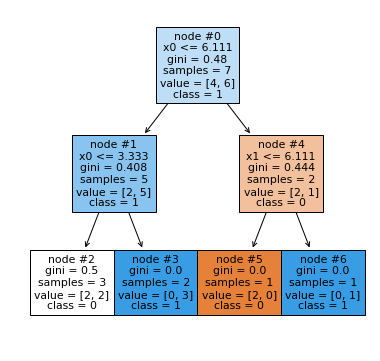

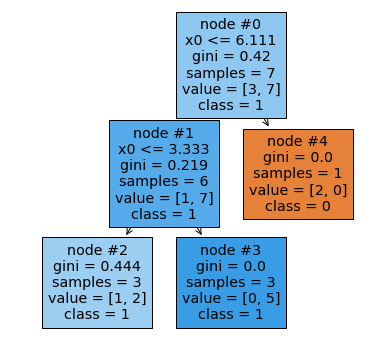

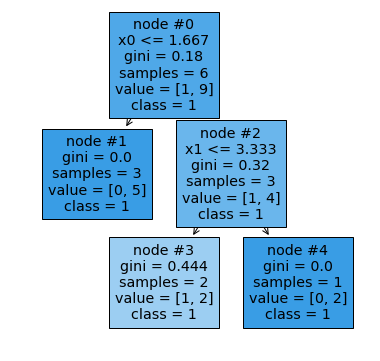

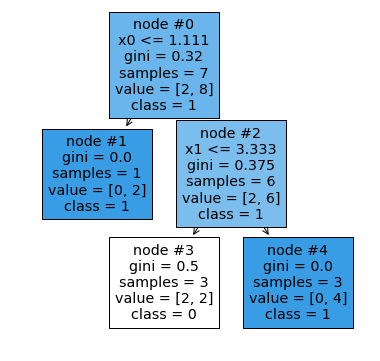

In [59]:
for tree_i in model.estimators_:
    fig, ax = plt.subplots()
    fig.set_size_inches(6,6)
    _ = plot_tree(tree_i, feature_names=x_train.columns, class_names=['0','1'], 
              filled=True, impurity=True, node_ids=True)
    plt.show()


In [4]:
def get_tree_paths(tree):
    pass

def get_most_probable_tree_paths(tree):
    pass

def plot_tree(tree):
    pass



[1, 1, 0, 0, 1, 1, 1, 0, 0, 0]